# Regional Analyses

In [1]:
import os
import rasterio as rs
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd
import matplotlib
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper

## Gut Checks on Stats

In [2]:
def check_stats(country):
    df = pd.read_csv(f'/Volumes/Jessicas_Life/_Processed_countries/{country}/stats/{country}_statistics.csv')
    print(f'SUMMARY FOR {country}:')
    print(df.info())
    print(' ')
    print(f'ESA LAND COVER CLASSES: {df.esa_class.nunique()}')
    print(df.esa_class.value_counts())
    print(' ')
    print(f'TOF means >100%: {len(df[df.tof_mean >= 100])}')
    print(f'Hans means >100%: {len(df[df.hans_mean >= 100])}')
    print(f'TOF NaN means: {len(df[df.tof_mean.isnull()])}')
    print(f'Hans NaN means: {len(df[df.hans_mean.isnull()])}')
    print(f'Confirm no ha if no mean: {len(df[(df.tof_mean == 0) & (df.tof_ha > 0)])}')
    print(' ')
    print('% LAND COVER THAT IS NaN')
    print(df[df.tof_mean.isnull()].esa_class.value_counts(normalize=True)*100)
    return df[:40]


In [4]:
check_stats('Guinea Bissau')

SUMMARY FOR Guinea Bissau:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1630 non-null   object 
 1   admin             1630 non-null   object 
 2   esa_id            1630 non-null   float64
 3   esa_class         1400 non-null   object 
 4   esa_sampled_ha    1630 non-null   float64
 5   esa_total_ha      1630 non-null   float64
 6   tree_cover_class  1630 non-null   object 
 7   tof_ha            1630 non-null   int64  
 8   hans_ha           1630 non-null   int64  
 9   tof_mean          1490 non-null   float64
 10  hans_mean         1630 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 140.2+ KB
None
 
ESA LAND COVER CLASSES: 17
Cropland, rainfed                                                 170
Cropland, irrigated or post-flooding                               90
No Data (flag)   

,country,admin,esa_id,esa_class,esa_sampled_ha,esa_total_ha,tree_cover_class,tof_ha,hans_ha,tof_mean,hans_mean
0,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,0-9,993,1283,49.666595,19.914051
1,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,10-19,338,982,49.666595,19.914051
2,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,20-29,252,1424,49.666595,19.914051
3,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,30-39,231,904,49.666595,19.914051
4,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,40-49,242,140,49.666595,19.914051
5,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,50-59,251,1,49.666595,19.914051
6,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,60-69,305,0,49.666595,19.914051
7,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,70-79,339,0,49.666595,19.914051
8,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,80-89,521,0,49.666595,19.914051
9,Guinea Bissau,Biombo,10.0,"Cropland, rainfed",3145.92,3526.06,90-99,784,0,49.666595,19.914051


## Create Regional Spreadsheets
Combines country stats spreadsheets into one csv for the region.

In [2]:
def create_regional_csv(list_of_countries, region):
    
    regional_df = pd.DataFrame()
    dfs_to_concat = []
    
    for country in list_of_countries:
        country_df = pd.read_csv(f'/Volumes/Jessicas_Life/_Processed_countries/{country}/stats/{country}_statistics.csv')
        dfs_to_concat.append(country_df)
    
    regional_df = pd.concat(dfs_to_concat, ignore_index=True)
    regional_df.to_csv(f'/Volumes/Jessicas_Life/regional_stats/{region}.csv', index=False)
    
    return None

In [3]:
create_regional_csv(['Belize', 'El Salvador', 'Honduras', 'Nicaragua', 'Panama', 'Guatemala', 'Costa Rica'], 
                    'central_am')

In [18]:
create_regional_csv(['Rwanda', 'Burundi'], 'east_afr')

In [ ]:
create_regional_csv(['Ghana'], 'west_afr')

In [7]:
ca = pd.read_csv('/Volumes/Jessicas_Life/regional_stats/central_am.csv')
ca.head()

,country,admin,esa_id,esa_class,esa_sampled_ha,esa_total_ha,tree_cover_class,tof_ha,hans_ha,tof_mean,hans_mean
0,Belize,Belize,10.0,"Cropland, rainfed",305.01,1474.75,0-9,44,1083,45.338989,19.443651
1,Belize,Belize,10.0,"Cropland, rainfed",305.01,1474.75,10-19,43,276,45.338989,19.443651
2,Belize,Belize,10.0,"Cropland, rainfed",305.01,1474.75,20-29,49,158,45.338989,19.443651
3,Belize,Belize,10.0,"Cropland, rainfed",305.01,1474.75,30-39,51,123,45.338989,19.443651
4,Belize,Belize,10.0,"Cropland, rainfed",305.01,1474.75,40-49,46,80,45.338989,19.443651


## Sampling Area: Country
This barchart illustrates the sampling coverage for each land cover class in a country. Each bar shows the sampled and total hectares of each land cover class in hectares (any hectare containing >0% tree cover is included). The results are sorted by hectares of land cover sampled in ascending order.

In [6]:
def lc_sampled(country):
    
    df = pd.read_csv(f'/Volumes/Jessicas_Life/_Processed_countries/{country}/stats/{country}_statistics.csv')
    df = df[['country', 'admin', 'esa_class', 'esa_sampled_ha', 'esa_total_ha']]

    df = df.drop_duplicates(keep='first', ignore_index=True)
    df.drop(df[df.esa_class == 'No Data (flag)'].index, inplace = True)
    df['esa_not_sampled'] = df['esa_total_ha'] - df['esa_sampled_ha']
    df = df.groupby(by='esa_class').sum().reset_index()
    df = df.sort_values(by='esa_sampled_ha')
    df['esa_perc_sampled'] = round((df['esa_sampled_ha'] / df['esa_total_ha']) * 100)
    
    # create the visualization
    plt.figure(figsize=(10,5))
    classes = list(df.esa_class.values)
    bars1 = df.esa_sampled_ha
    bars2 = df.esa_not_sampled

    plt.barh(classes, bars1, color="#f3e151", label='sampled')  
    plt.barh(classes, bars2, left=bars1, color="#6c3376", label='not sampled')

    plt.title(f'Land Cover Sampled in {country}')
    plt.xlabel('Tree Cover (ha)')
    plt.ticklabel_format(useOffset=False, style='plain', axis='x')
    plt.grid(axis='x', linestyle='-', linewidth=.2)
    plt.legend();
    
    return

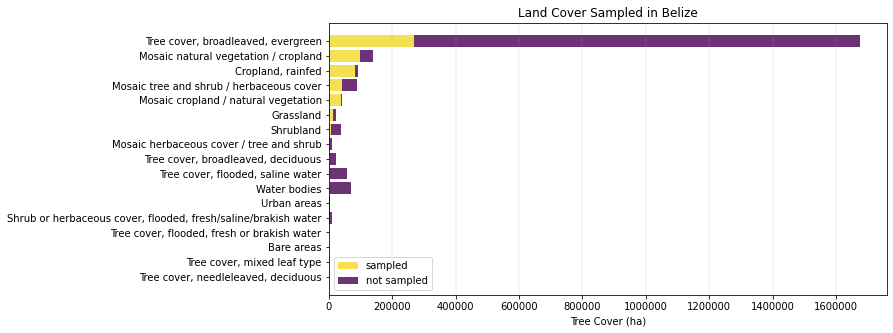

In [34]:
lc_sampled('Belize')

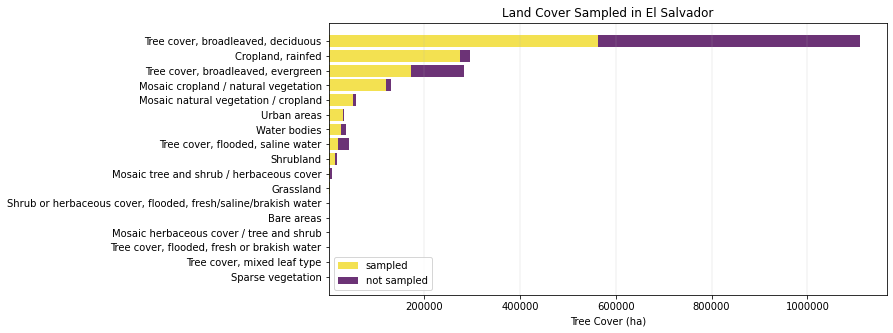

In [35]:
lc_sampled('El Salvador')

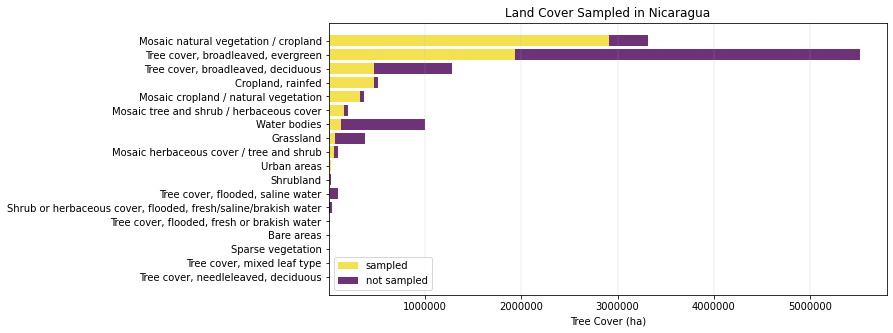

In [36]:
lc_sampled('Nicaragua')

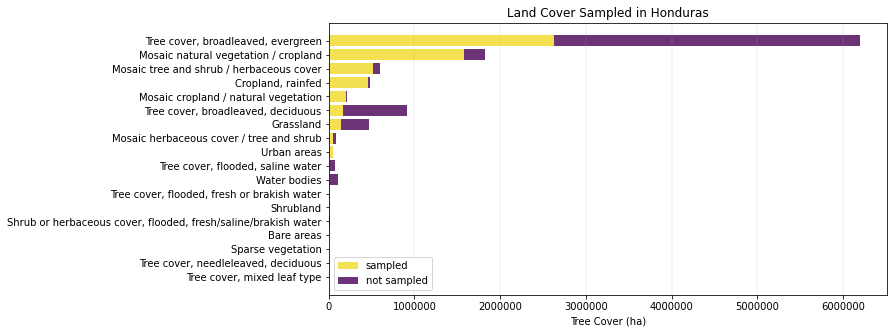

In [37]:
lc_sampled('Honduras')

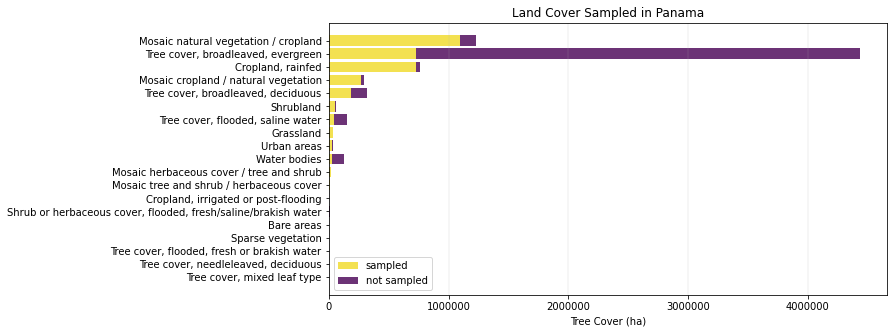

In [38]:
lc_sampled('Panama')

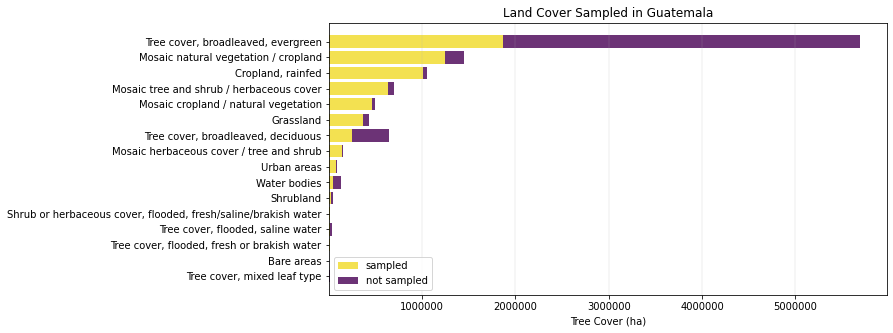

In [58]:
lc_sampled('Guatemala')

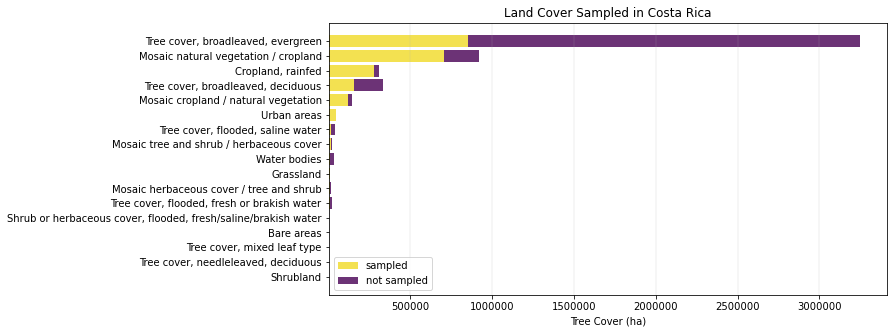

In [7]:
lc_sampled('Costa Rica')

## Top 5 Admins with Trees on Farms
This function returns the top five administrative districts with tree cover on agriculture land cover types.   

It addresses two questions:  
Which admins have the highest mean tree cover in agricultural areas?  
Which admins have the most hectares of tree cover in agricultural areas?  

Outstanding items to address:
- Ha of tree cover should be weighted in some way

In [8]:
def trees_on_farms(region):
    
    '''
    Filters dataframe to the following ESA agriculture land cover types:
    
    Cropland, rainfed
    Cropland, rainfed, herbaceous cover
    Cropland, irrigated or post-flooding
    Mosaic cropland / natural vegetation
    Mosaic natural vegetation / cropland 
    
    Calculates the total ha tree cover per admin AND the avg % tree cover per admin.
    Merges the dataframes to include % of land cover class sampled and then builds
    two separate dataframes of top 5 cities in the region with highest stats.
    
    '''
    
    df = pd.read_csv(f'/Volumes/Jessicas_Life/regional_stats/{region}.csv')
    
    # filter to only ag land cover classes
    ag_ids = [10.0, 11.0, 20.0, 30.0, 40.0]
    df = df[df.esa_id.isin(ag_ids)]

    # get total (sum) ha tree cover in ag for each admin (drop ha <10% cover)
    df_ha = df.drop(df[df.tree_cover_class == '0-9'].index)
    df_ha = df.groupby(by=['country', 'admin']).sum().reset_index() 
    df_ha = df_ha[['country', 'admin', 'esa_sampled_ha', 'esa_total_ha','tof_ha']] 
    
    # add column with % of land cover class that was sampled
    df_ha['esa_perc_samp'] = round((df_ha.esa_sampled_ha / df_ha.esa_total_ha) * 100, 2)

    # now use original dataframe to get average tree cover in ag for each admin
    df_avg = df.groupby(by=['country','admin']).mean().reset_index()
    df_avg = df_avg[['country', 'admin', 'tof_mean']]
    
    # merge dataframes
    df_merged = pd.merge(df_ha, df_avg, how='inner', left_on=['country','admin'], right_on=['country','admin'])
    
    # sort and print top 5 ag areas
    top_5_ha = df_merged.sort_values(['tof_ha', 'esa_perc_samp'], ascending=(False, False))[:5]
    top_5_avg = df_merged.sort_values(['tof_mean', 'esa_perc_samp'], ascending=(False, False))[:5]
    
    print('Top 5 Admins with Trees on Farms (total hectares tree cover)')
    for i in top_5_ha.index:
        print(f'Farms in {top_5_ha.admin[i]}, {top_5_ha.country[i]} have {top_5_ha.tof_ha[i]} ' \
              f'ha of tree cover >10%. ({top_5_ha.esa_perc_samp[i]}% of farms were sampled)')
#         print(f'{top_5_ha.esa_perc_samp[i]}% of farms were sampled in {top_5_ha.admin[i]}, ' \
#               f'{top_5_ha.country[i]} with {top_5_ha.tof_ha[i]} ha of tree cover >0%.')
    
    print(' ')
    print('Top 5 Admins with Trees on Farms (average % tree cover)')
    for i in top_5_avg.index:
        print(f'Farms in {top_5_avg.admin[i]}, {top_5_avg.country[i]} have {round(top_5_avg.tof_mean[i], 0)}% ' \
              f'average tree cover. ({top_5_avg.esa_perc_samp[i]}% of farms were sampled)')
        
#         print(f'{top_5_avg.esa_perc_samp[i]}% of farms were sampled in {top_5_avg.admin[i]}, ' \
#               f'{top_5_avg.country[i]} with {round(top_5_avg.tof_mean[i], 0)}% average tree cover.')

    return df_merged

In [9]:
central_am = trees_on_farms('central_am')

Top 5 Admins with Trees on Farms (total hectares tree cover)
Farms in Petén, Guatemala have 1844046 ha of tree cover >10%. (95.7% of farms were sampled)
Farms in Atlántico Sur, Nicaragua have 1099550 ha of tree cover >10%. (87.86% of farms were sampled)
Farms in Olancho, Honduras have 743352 ha of tree cover >10%. (90.25% of farms were sampled)
Farms in Veraguas, Panama have 568600 ha of tree cover >10%. (96.59% of farms were sampled)
Farms in Chontales, Nicaragua have 544562 ha of tree cover >10%. (95.29% of farms were sampled)
 
Top 5 Admins with Trees on Farms (average % tree cover)
Farms in Emberá, Panama have 66.0% average tree cover. (3.08% of farms were sampled)
Farms in El Progreso, Guatemala have 50.0% average tree cover. (93.43% of farms were sampled)
Farms in Estelí, Nicaragua have 47.0% average tree cover. (66.68% of farms were sampled)
Farms in Sacatepéquez, Guatemala have 47.0% average tree cover. (97.04% of farms were sampled)
Farms in Carazo, Nicaragua have 46.0% averag

## Top 5 Admins with Urban Trees
This function highlights the top five administrative districts in a region with most tree cover in urban land cover types. It addresses two questions:  
Which admins have the highest mean tree cover in urban areas?  
Which admins have the most hectares of tree cover in urban areas?  

In [83]:
def trees_in_cities(region):
    
    '''
    Filters dataframe to the ESA urban land cover class. 
    
    Calculates the total ha tree cover per admin or the comb avg  % tree cover per admin,
    then sorts values in descending order to get top 5 admins.
    
    '''
    
    df = pd.read_csv(f'regional_stats/{region}.csv')
    
    # filter to only urban land cover class
    df = df[df.esa_id == 190.0]
    
    # get total (sum) ha tree cover in urban class for each admin
    df_ha = df.groupby(by=['country', 'admin']).sum().reset_index() 
    df_ha = df_ha[['country', 'admin', 'esa_sampled_ha', 'esa_total_ha','tof_ha']] 
    
    # add column with % of land cover class that was sampled
    df_ha['esa_perc_samp'] = round((df_ha.esa_sampled_ha / df_ha.esa_total_ha) * 100, 2)

    # now use original dataframe to get average tree cover in urban class for each admin
    df_avg = df.groupby(by=['country','admin']).mean().reset_index()
    df_avg = df_avg[['country', 'admin', 'tof_mean']]
    
    # merge dataframes
    df_merged = pd.merge(df_ha, df_avg, how='inner', left_on=['country','admin'], right_on=['country','admin'])
    
    # sort and print top 5 urban areas
    top_5_ha = df_merged.sort_values(['tof_ha', 'esa_perc_samp'], ascending=(False, False))[:5]
    top_5_ha = top_5_ha.reset_index().drop('index', 1)
    top_5_avg = df_merged.sort_values(['tof_mean', 'esa_perc_samp'], ascending=(False, False))[:5]
    top_5_avg = top_5_avg.reset_index().drop('index', 1)

    
    print('Top 5 Cities with Trees (total hectares tree cover)')
    for i in top_5_ha.index:
        print(f'{top_5_ha.esa_perc_samp[i]}% of urban areas were sampled in {top_5_ha.admin[i]}, ' \
              f'{top_5_ha.country[i]} with {top_5_ha.tof_ha[i]} ha of tree cover >0%.')
    
    print(' ')
    print('Top 5 Cities with Trees (average % tree cover)')
    for i in top_5_avg.index:
        print(f'{top_5_avg.esa_perc_samp[i]}% of urban areas were sampled in {top_5_avg.admin[i]}, ' \
              f'{top_5_avg.country[i]} with {round(top_5_avg.tof_mean[i], 0)}% average tree cover.')
        
    # display top 5 ha
    num1 = rs.open(f'{top_5_ha.country[0]}/resampled_rasters/tof/{top_5_ha.admin[0]}.tif').read(1)
    num2 = rs.open(f'{top_5_ha.country[1]}/resampled_rasters/tof/{top_5_ha.admin[1]}.tif').read(1)
    
    plt.figure(figsize=(30,20))

    plt.subplot(1,2,1)
    plt.imshow(num1, cmap='Greens', vmin=0, vmax=100)
    plt.title(f'#1: {top_5_ha.admin[0]}, {top_5_ha.country[0]} (ha tree cover)')

    plt.subplot(1,2,2)
    plt.imshow(num2, cmap='Greens', vmin=0, vmax=100)
    plt.title(f'#2: {top_5_ha.admin[1]}, {top_5_ha.country[1]} (ha tree cover)')

    # figure out where in that admin has the highest tree cover by lat/lon coordinates?
    # long term could scale down to admin 2 level in these areas?

    return None

In [ ]:
def top_5_cities(data, figsize, barwidth): # data is above or between dataframe
    
    # filter the dataframe to top 5 cities with highest tof avg
    settlement = data[data.ipcc_class == 'Settlement'].sort_values('tof_mean_tc_lc', ascending=False)[:5]
    
    labels = settlement.admin
    x = np.arange(len(labels))  
    width = barwidth  
    
    plt.figure(figsize=figsize)
    plt.bar(x - width/2, settlement.tof_mean_tc_lc, width, label='TOF', color='navy', edgecolor='white')
    plt.bar(x + width/2, settlement.hans_mean_tc_lc, width, label='Hansen', color='darkred', edgecolor='white')

    plt.title('Top 5 Cities with Highest Avg % Tree Cover (TOF)')
    plt.ylabel('% Tree Cover')    
    plt.xticks(x, labels=labels, rotation=60)
    plt.grid(axis='y', linestyle='-', linewidth=.2)
    plt.legend()
    plt.tight_layout()
    
    return None

In [85]:
#central_am_cities = trees_in_cities('central_am')

In [70]:
central_am_cities.country[0]

'Guatemala'

## Ag/Urban Areas Meeting Forest Cover Definition (>10%)
The FAO defines Forest as a land area of more than 0.5 ha, with a tree canopy cover of more than 10%, which is not primarily under agricultural or other specific non-forest land use. This visualization illustrates the tree cover in agriculture and urban areas that qualifies as forest under this definition. The yellow portion indicates the percentage of tree cover that is not compliant (<10%) and the purple portion indicates the percentage of tree cover that is compliant (>10%).

What is the total percentage of ag land that meets the forest cover definition in 2020?  
What is the total percentage of ag land with >10% cover? 20% cover? 30% cover?

In [37]:
# AG
ca = pd.read_csv('/Volumes/Jessicas_Life/regional_stats/central_am.csv')

ag_ids = [10.0, 11.0, 12.0, 20.0, 30.0, 40.0]
ca = ca[ca.esa_id.isin(ag_ids)]

# get the total # ha per tree cover threshold per country
ca = ca.groupby(by=['country', 'tree_cover_class']).sum().reset_index()

# filter df
ca = ca[['country', 'tree_cover_class', 'tof_ha']] 

# look at only the compliant ha (>10%)
ca_over10 = ca[ca.tree_cover_class != '0-9']
ca_over20 = ca[(ca.tree_cover_class != '0-9') & (ca.tree_cover_class != '10-19')]
ca_over30 = ca[(ca.tree_cover_class != '0-9') & (ca.tree_cover_class != '10-19') & (ca.tree_cover_class != '20-29')]
ca_total = sum(ca.tof_ha)
ca_over10_perc = sum(ca_over10.tof_ha) / ca_total * 100
ca_over20_perc = sum(ca_over20.tof_ha) / ca_total * 100
ca_over30_perc = sum(ca_over30.tof_ha) / ca_total * 100

print(f'Total percentage of ag land that meets forest cover definition (>10% tree cover): {round((ca_over10_perc),2)}%')
print(f'Total percentage of ag land >20% tree cover: {round((ca_over20_perc),2)}%')
print(f'Total percentage of ag land >30% tree cover:  {round((ca_over30_perc),2)}%')

Total percentage of ag land that meets forest cover definition (>10% tree cover): 74.83%
Total percentage of ag land >20% tree cover: 62.3%
Total percentage of ag land >30% tree cover:  52.35%


In [38]:
#urban
ca = pd.read_csv('/Volumes/Jessicas_Life/regional_stats/central_am.csv')

urb_ids = [190.0]
ca = ca[ca.esa_id.isin(urb_ids)]

# get the total # ha per tree cover threshold per country
ca = ca.groupby(by=['country', 'tree_cover_class']).sum().reset_index()

# filter df
ca = ca[['country', 'tree_cover_class', 'tof_ha']] 

# look at only the compliant ha (>10%)
ca_over10 = ca[ca.tree_cover_class != '0-9']
ca_over20 = ca[(ca.tree_cover_class != '0-9') & (ca.tree_cover_class != '10-19')]
ca_over30 = ca[(ca.tree_cover_class != '0-9') & (ca.tree_cover_class != '10-19') & (ca.tree_cover_class != '20-29')]
ca_total = sum(ca.tof_ha)
ca_over10_perc = sum(ca_over10.tof_ha) / ca_total * 100
ca_over20_perc = sum(ca_over20.tof_ha) / ca_total * 100
ca_over30_perc = sum(ca_over30.tof_ha) / ca_total * 100

print(f'Total percentage of urban land that meets forest cover definition (>10% tree cover): {round((ca_over10_perc),2)}%')
print(f'Total percentage of urban land >20% tree cover: {round((ca_over20_perc),2)}%')
print(f'Total percentage of urban land >30% tree cover:  {round((ca_over30_perc),2)}%')

Total percentage of urban land that meets forest cover definition (>10% tree cover): 66.81%
Total percentage of urban land >20% tree cover: 45.73%
Total percentage of urban land >30% tree cover:  30.81%


In [10]:
def forest_cover_compliant_comb(region, figsize):
    
    region_df = pd.read_csv(f'/Volumes/Jessicas_Life/regional_stats/{region}.csv')
    
    countries = list(set(region_df.country.values))

    x_labels = []
    bar1 = []
    bar2 = []

    for country in countries:
        
        # filter to one country and only urban/ag land cover classes
        country_df = region_df[region_df.country == country]
        ids = [10.0, 11.0, 12.0, 20.0, 30.0, 40.0, 190.0]
        country_df = country_df[country_df.esa_id.isin(ids)]
        
        # get total tof ha per tree cover threshold
        country_df = country_df.groupby(by=['country', 'tree_cover_class']).sum().reset_index() 
        country_df = country_df[['country', 'tree_cover_class', 'tof_ha']] 
        
        # calculate # ha <10% tree cover and >10% tree cover
        under10 = country_df.tof_ha[0]
        over10 = sum(country_df.tof_ha[1:])
        
        # normalize
        total = under10 + over10
        under10_norm = under10/total*100
        over10_norm = over10/total*100
        
        x_labels.append(country)
        bar1.append(over10_norm)
        bar2.append(under10_norm)
   
    # convert to array in order to add data labels
    bar1 = np.asarray(bar1)
    bar2 = np.asarray(bar2)
    
    # create the figure
    plt.figure(figsize=figsize)
    plt.bar(x_labels, bar1, color="seagreen", label='<10% cover')  
    plt.bar(x_labels, bar2, bottom=bar1, color="honeydew", label='>10% cover')    
    
    # labels
    for xpos, ypos, yval in zip(x_labels, bar1/2, bar1):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    for xpos, ypos, yval in zip(x_labels, bar1 + bar2/2, bar2):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    
    plt.xlabel(' ')
    plt.ylabel('% Tree Cover')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'% Ag and Urban Trees Meeting Forest \n Cover Definition')
    plt.legend(loc='lower right');

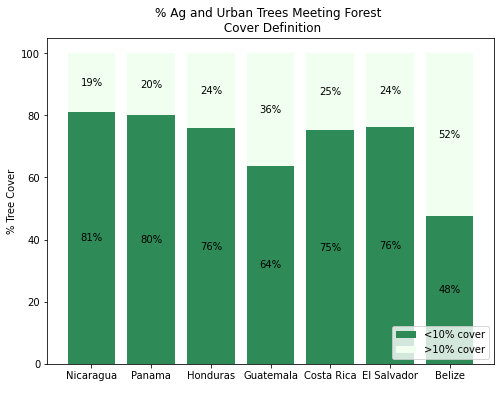

In [11]:
forest_cover_compliant_comb('central_am', (8,6))

In [12]:
def forest_cover_compliant(region, figsize):
    
    '''
    Legend for ESA land cover categories:
        10: 'Cropland, rainfed',
        11: 'Cropland, rainfed',
        12: 'Cropland, rainfed',
        20: 'Cropland, irrigated or post-flooding',
        30: 'Mosaic cropland / natural vegetation',
        40: 'Mosaic natural vegetation / cropland',
        190: 'Urban areas'
    '''
    
    region_df = pd.read_csv(f'/Volumes/Jessicas_Life/regional_stats/{region}.csv')
    
    countries = list(set(region_df.country.values))

    x_labels, ag_bar1, ag_bar2, urban_bar1, urban_bar2 = [],[],[],[],[]
    
    for country in countries:
        
        # filter to one country and only urban/ag land cover classes
        country_df = region_df[region_df.country == country]
        ag_ids = [10.0, 11.0, 12.0, 20.0, 30.0, 40.0]
        urban_ids = [190.0]
        ag_df = country_df[country_df.esa_id.isin(ag_ids)]
        urban_df = country_df[country_df.esa_id.isin(urban_ids)]
        
        # get total tof ha per tree cover threshold
        ag_df = ag_df.groupby(by=['country', 'tree_cover_class']).sum().reset_index() 
        ag_df = ag_df[['country', 'tree_cover_class', 'tof_ha']] 
        urban_df = urban_df.groupby(by=['country', 'tree_cover_class']).sum().reset_index() 
        urban_df = urban_df[['country', 'tree_cover_class', 'tof_ha']] 
        
        # calculate # ha <10% tree cover and >10% tree cover
        ag_under10 = ag_df.tof_ha[0]
        ag_over10 = sum(ag_df.tof_ha[1:])
        urban_under10 = urban_df.tof_ha[0]
        urban_over10 = sum(urban_df.tof_ha[1:])
        
        # normalize
        ag_under10_norm = ag_under10/(ag_under10 + ag_over10)*100
        ag_over10_norm = ag_over10/(ag_under10 + ag_over10)*100
        urban_under10_norm = urban_under10/(urban_under10 + urban_over10)*100
        urban_over10_norm = urban_over10/(urban_under10 + urban_over10)*100
        
        x_labels.append(country)
        ag_bar1.append(ag_over10_norm) # >10% is on the bottom
        ag_bar2.append(ag_under10_norm) # <10% is on the top
        urban_bar1.append(urban_over10_norm) 
        urban_bar2.append(urban_under10_norm) 
   
    # convert to array in order to add data labels
    ag_bar1 = np.asarray(ag_bar1)
    ag_bar2 = np.asarray(ag_bar2)
    urban_bar1 = np.asarray(urban_bar1)
    urban_bar2 = np.asarray(urban_bar2)

    plt.figure(figsize=figsize)
    
    # Ag plot
    plt.subplot(1,2,1)
    plt.bar(x_labels, ag_bar1, color="seagreen", label='>10% cover')  
    plt.bar(x_labels, ag_bar2, bottom=ag_bar1, color="honeydew", label='<10% cover')    
    
    # labels
    for xpos, ypos, yval in zip(x_labels, ag_bar1/2, ag_bar1):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    for xpos, ypos, yval in zip(x_labels, ag_bar1 + ag_bar2/2, ag_bar2):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    
    plt.xlabel(' ')
    plt.ylabel('% Tree Cover')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'% Ag Trees Meeting Forest \n Cover Definition')
    plt.legend(loc='lower right')
    
    # Urban plot
    plt.subplot(1,2,2)
    plt.bar(x_labels, urban_bar1, color="seagreen", label='>10% cover')  
    plt.bar(x_labels, urban_bar2, bottom=urban_bar1, color="honeydew", label='<10% cover')    
    
    # labels
    for xpos, ypos, yval in zip(x_labels, urban_bar1/2, urban_bar1):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    for xpos, ypos, yval in zip(x_labels, urban_bar1 + urban_bar2/2, urban_bar2):
        plt.text(xpos, ypos, f'{round(yval)}%', ha="center", va="center")
    
    plt.xlabel(' ')
    plt.ylabel('% Tree Cover')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'% Urban Trees Meeting Forest \n Cover Definition')
    plt.legend(loc='lower right')
    plt.tight_layout(); 

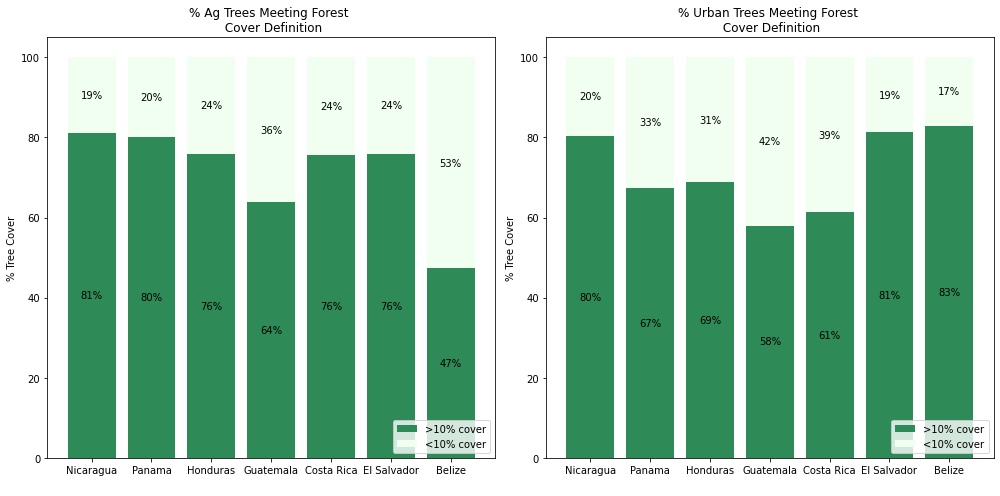

In [13]:
forest_cover_compliant('central_am', (14,7))

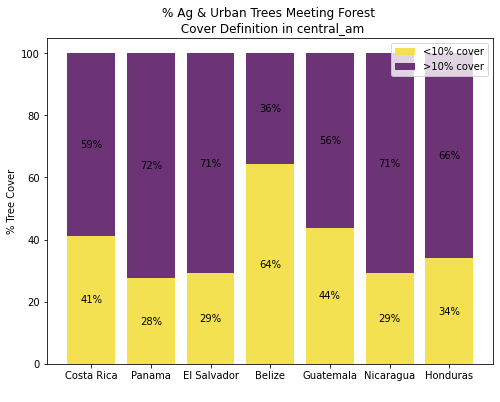

In [33]:
# OLD
forest_cover_compliant('central_am', (8,6))

In [ ]:
# across the region, which admins have the greates

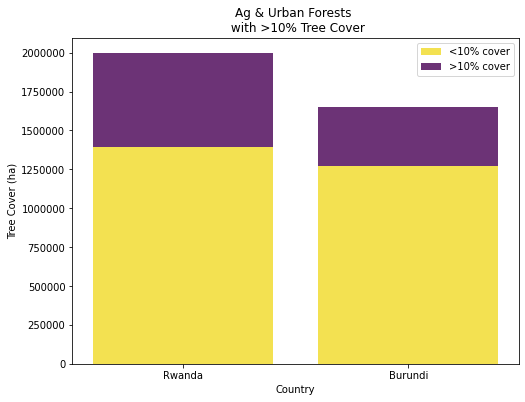

In [15]:
forest_cover_compliant('east_afr', (8,6))

## Top 5 Admins with Fragmented Forests
Clarification: are we calculating the number of admins with the "most" fragmented forests and what does that mean?
- fragmented forest: the area of forest within one pixel of the edge
- forest connectivity: the area of disconnected forest fragments

Could replicate the approach used by [Cunningham et al. 2020](https://www.mdpi.com/2072-4292/12/19/3226/htm) and use the Guidos Toolbox [MSPA (Morphological Spatial Pattern Analysis)](https://forest.jrc.ec.europa.eu/en/activities/lpa/mspa/)
- Soille P, Vogt P, 2009. Morphological segmentation of binary patterns. Pattern Recognition Letters 30, 4:456-459, DOI: 10.1016/j.patrec.2008.10.015 

OpenForis example implementation - python?: https://github.com/openforis/mspa-analysis/blob/master/scripts/mspa.py

## Tree Cover Distribution: Regional Comparisons
This grouped barchart compares tree cover distribution in 10% canopy cover thresholds across four regions: Central America, East Africa, West Africa, Sahel). (In the future could consider a facet grid that illustrates the distribution in a barchart per country)

In [19]:
def tree_cover_distribution(central_am, east_afr):
    
    # later will be updated to compare across 4 regions
    #central_am = pd.read_csv('regional_stats/central_am.csv')
    #east_afr = pd.read_csv('regional_stats/east_afr.csv')
    #west_afr = pd.read_csv('regional_stats/west_afr.csv')
    #sahel = pd.read_csv('regional_stats/sahel.csv')

    central_am = central_am.groupby(by=['tree_cover_class']).sum().reset_index() 
    central_am = central_am[['tree_cover_class', 'tof_ha']]

    east_afr = east_afr.groupby(by=['tree_cover_class']).sum().reset_index() 
    east_afr = east_afr[['tree_cover_class', 'tof_ha']]

    labels = list(central_am.tree_cover_class)
    x = np.arange(len(labels))  # the label locations
    width = 0.35  

    plt.figure(figsize=(10,8))
    plt.bar(x - width/2, central_am.tof_ha, width, label='Central America')
    plt.bar(x + width/2, east_afr.tof_ha, width, label='East Africa')

    plt.title('Tree Cover Distribution by Region')
    plt.xlabel('Thresholds (%)')
    plt.ylabel('Total Ha')
    plt.xticks(x, labels=labels)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(axis='y', linestyle='-', linewidth=.2)
    plt.legend();
    
    return None

In [20]:
central_am = pd.read_csv('regional_stats/central_am.csv')
east_afr = pd.read_csv('regional_stats/east_afr.csv')

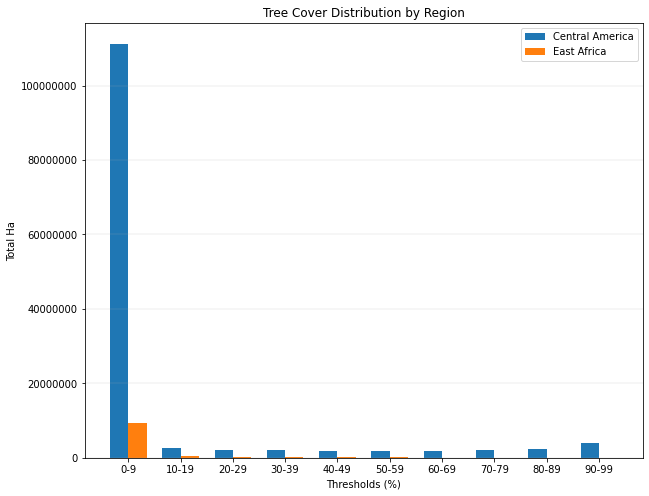

In [21]:
tree_cover_distribution(central_am, east_afr)

## Bokeh

In [59]:
peten = rs.open('/Volumes/Jessicas_Life/_Processed_countries/Guatemala/resampled_rasters/tof/Petén.tif').read(1)
peten_esa = rs.open('/Volumes/Jessicas_Life/_Processed_countries/Guatemala/resampled_rasters/tof/Petén.tif').read(1)
stats = pd.read_csv('/Volumes/Jessicas_Life/_Processed_countries/Guatemala/stats/Guatemala_statistics.csv')
gua_shape = gpd.read_file('/Volumes/Jessicas_Life/_Processed_countries/Guatemala/Guatemala_adminboundaries.geojson')

In [42]:
peten_shape = gua_shape[gua_shape.NAME_1 == 'Petén']
peten_shape

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
11,GTM,Guatemala,GTM.12_1,Petén,None,None,Departamento,Department,None,GT.PE,"POLYGON ((-89.19792 16.27711, -89.20341 16.195..."


In [54]:
# Initialize the plot
# p = figure(title="Trees in Peten")
# p

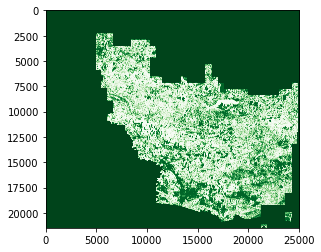

In [63]:
plt.imshow(peten, cmap='Greens', vmin=0, vmax=100);

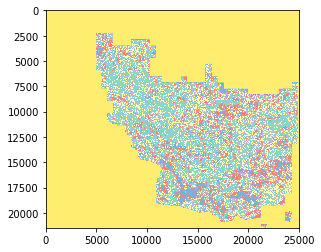

In [66]:
plt.imshow(peten_esa, cmap='Set3');

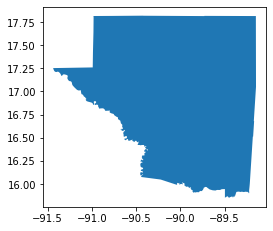

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
peten_shape.plot(ax=ax);

In [45]:
peten_shape

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
11,GTM,Guatemala,GTM.12_1,Petén,None,None,Departamento,Department,None,GT.PE,"POLYGON ((-89.19792 16.27711, -89.20341 16.195..."


In [46]:
# must turn the polygon into coordinates that are readable by bokeh

def get_polycoords(row, geom, coord_type):
    
    """
    Returns the coordinates ('x' or 'y') of edges of a Polygon 
    exterior
    """

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    # Get the x coordinates of the exterior
    if coord_type == 'x':
        return list( exterior.coords.xy[0] )
   
    # Get the y coordinates of the exterior
    elif coord_type == 'y':
        return list( exterior.coords.xy[1] )

In [48]:
# Get the Polygon x and y coordinates
peten_shape['x'] = peten_shape.apply(get_polycoords, geom='geometry', coord_type='x', axis=1)
peten_shape['y'] = peten_shape.apply(get_polycoords, geom='geometry', coord_type='y', axis=1)

peten_shape

ImportError: cannot import name 'AggFuncType' from 'pandas._typing' (/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/pandas/_typing.py)

In [49]:
import pandas
print(pandas.__version__)

1.0.4


In [52]:
import geopandas
print(geopandas.__version__)

0.9.0


In [51]:
import bokeh
print(bokeh.__version__)

2.3.3
